1. 了解如何使用数据集和验证机

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target
# print(x)
print(len(x))
print(len(y))

150
150


In [1]:
import pandas as pd
import numpy as np

dataset_label=pd.read_csv('../创新实践大三上/数据集/RandomLabel1.csv')
dataset_features=pd.read_csv('../创新实践大三上/数据集/node_features.csv')

y1=pd.DataFrame(dataset_label)
x1=pd.DataFrame(dataset_features)
y_array=np.array(y1)
x_array=np.array(x1)
x=x_array[:,1:]
y=y_array[:,1:]
y=y.reshape(-1)

print(x.shape)
print(y.shape)

(2600, 27)
(2600,)


D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  

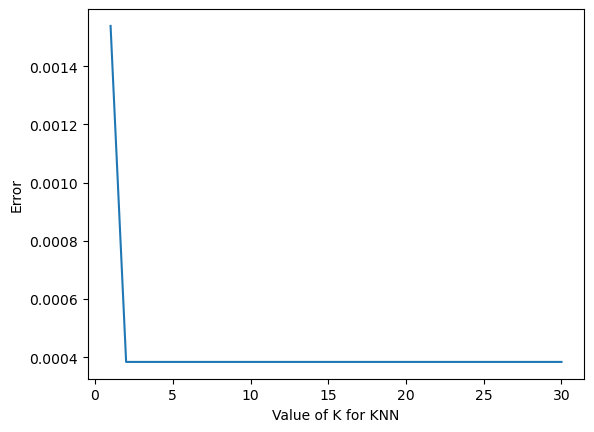

In [2]:
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)
k_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
     #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, x, y.astype("int"), cv=6, scoring='accuracy')
    k_error.append(1 - scores.mean())
#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

k_select=5  # 值来源于上图的输出结果
test_size=[0.75,0.65,0.55,0.45,0.35,0.25]
knn_auc=[]
knn_recall=[]
knn_precision=[]
knn_f1_score=[]

for i in range(len(test_size)):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size[i])
    knn = KNeighborsClassifier(n_neighbors=k_select)
    knn.fit(x_train,y_train.astype("int"))
    y_pre=knn.predict(x_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test.astype("int"),y_pre.astype("int"),pos_label=2)
    print("测-----试-----",i)
    print(metrics.auc(fpr,tpr))
    print(classification_report(y_test.astype("int"),y_pre.astype("int")))






D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defin

测-----试----- 0
nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1949
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1950
   macro avg       0.50      0.50      0.50      1950
weighted avg       1.00      1.00      1.00      1950

测-----试----- 1
nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690

测-----试----- 2
nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1430
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1431
   macro avg       0.50      0.50      0.50      1431
weighted avg       1.00      1.00      1.00      1431

测-----试----- 3
n

D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
D:\Anaconda3\envs\ExercisePytorch\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defin

2. 使用小的数据集测试代码是否有问题

In [12]:
#coding:utf-8
from sklearn.linear_model import LinearRegression  #导入线性回归模型
from sklearn import datasets #sk-learn 内置数据库
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
'''KNN算法'''
iris = datasets.load_iris() #内置的鸢尾花卉数据集
#数据集包含150个数据集，分为3类，每类50个数据,
#可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个特征预测鸢尾花卉属于
#(Setosa，Versicolour，Virginica)三个种类中的哪一类
iris_X,iris_y = iris.data,iris.target #数据集及其对应的分类标签
# 将数据集随机分为训练数据集和测试数据集
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
#用于训练模型
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
#用于测试模型
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# knn = KNeighborsClassifier()
# knn.fit(iris_X_train,iris_y_train)
# prediction = knn.predict(iris_X_test)
# fpr,tpr,thresholds = metrics.roc_curve(iris_y_test,prediction,pos_label=2)



# print(metrics.auc(fpr,tpr))
# print(classification_report(iris_y_test,prediction))





测-----试----- 1
1.0


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

3. 尝试线性回归算法计算

4. 简单尝试数据的可视化

In [11]:
from sklearn.linear_model import LinearRegression  #导入线性回归模型

test_size=[0.75,0.65,0.55,0.45,0.35,0.25]

for i in range(len(test_size)):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size[i])
    model = LinearRegression()  #创建线性回归对象
    model.fit(x_train,y_train)
    y_pre=model.predict(x_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pre,pos_label=2)
    print("测-----试-----",i)
    print(metrics.auc(fpr,tpr))
    print(classification_report(y_test,y_pre))


[[1.00260811]
 [1.08884505]
 [0.77355051]
 [1.00817609]
 [0.73932355]
 [0.88525681]
 [1.07003743]
 [0.60435542]
 [1.1077212 ]
 [0.61727637]
 [0.5312585 ]
 [0.97179442]
 [0.74723825]
 [0.90881147]
 [0.63796887]
 [0.82071381]
 [0.63691259]
 [0.69877635]
 [1.09458088]
 [0.78061915]
 [0.57551475]
 [0.61634707]
 [0.9527837 ]
 [0.68402843]
 [0.8701237 ]
 [1.08821562]
 [1.13139134]
 [0.45922256]
 [1.00080858]
 [0.8428323 ]
 [0.47855056]
 [0.99373967]
 [0.69261162]
 [0.76138267]
 [0.89411508]
 [0.96558731]
 [0.87054788]
 [0.96476951]
 [0.69722844]
 [1.07060473]
 [1.04450193]
 [0.68127578]
 [0.91372521]
 [0.92212874]
 [0.93141951]
 [0.90561483]
 [0.87418571]
 [0.56624803]
 [0.9378126 ]
 [0.87432891]
 [0.67525914]
 [0.9382454 ]
 [0.87690469]
 [0.55904555]
 [0.4658641 ]
 [0.92605373]
 [1.0712889 ]
 [0.57868445]
 [0.75874663]
 [0.80207835]
 [1.06727473]
 [0.72739777]
 [0.97974248]
 [0.94057759]
 [0.60362405]
 [0.82825667]
 [0.73846935]
 [0.72703579]
 [0.79218256]
 [0.83581709]
 [0.6830298 ]
 [1.06